In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
Gender                            2111 non-null object
Age                               2111 non-null float64
Height                            2111 non-null float64
Weight                            2111 non-null float64
family_history_with_overweight    2111 non-null object
FAVC                              2111 non-null object
FCVC                              2111 non-null float64
NCP                               2111 non-null float64
CAEC                              2111 non-null object
SMOKE                             2111 non-null object
CH2O                              2111 non-null float64
SCC                               2111 non-null object
FAF                               2111 non-null float64
TUE                               2111 non-null float64
CALC                              2111 non-null object
MTRANS                            2111 non-null object
NObey

In [5]:
df = df.dropna()

In [6]:
df['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [7]:
df['family_history_with_overweight'].value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [8]:
df['FAVC'].value_counts()

yes    1866
no      245
Name: FAVC, dtype: int64

In [9]:
df['CAEC'].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [10]:
df['SMOKE'].value_counts()

no     2067
yes      44
Name: SMOKE, dtype: int64

In [11]:
df['SCC'].value_counts()

no     2015
yes      96
Name: SCC, dtype: int64

In [12]:
df['CALC'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [13]:
df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [14]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

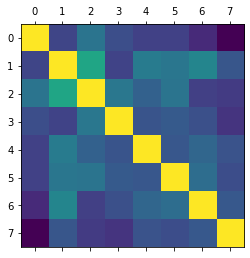

In [15]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

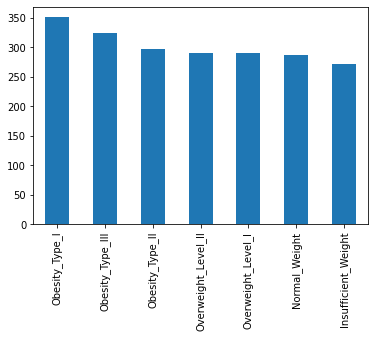

In [16]:
df.NObeyesdad.value_counts().plot(kind='bar');

In [17]:
# Data preprocessing
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['family_history_with_overweight']= label_encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC']= label_encoder.fit_transform(df['FAVC'])
df['CAEC']= label_encoder.fit_transform(df['CAEC'])
df['SMOKE']= label_encoder.fit_transform(df['SMOKE'])
df['SCC']= label_encoder.fit_transform(df['SCC'])
df['CALC']= label_encoder.fit_transform(df['CALC'])
df['MTRANS']= label_encoder.fit_transform(df['MTRANS'])
df['NObeyesdad']= label_encoder.fit_transform(df['NObeyesdad'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 0 to 2110
Data columns (total 17 columns):
Gender                            2111 non-null int32
Age                               2111 non-null float64
Height                            2111 non-null float64
Weight                            2111 non-null float64
family_history_with_overweight    2111 non-null int32
FAVC                              2111 non-null int32
FCVC                              2111 non-null float64
NCP                               2111 non-null float64
CAEC                              2111 non-null int32
SMOKE                             2111 non-null int32
CH2O                              2111 non-null float64
SCC                               2111 non-null int32
FAF                               2111 non-null float64
TUE                               2111 non-null float64
CALC                              2111 non-null int32
MTRANS                            2111 non-null int32
NObeyesdad   

In [19]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [20]:
X = df[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS',]]
y = df['NObeyesdad']

# SVM Based FS

In [21]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVC

In [22]:
estimator = LinearSVC()
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=0, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
      estimator=LinearSVC(), scoring='accuracy')

In [23]:
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X.columns[rfecv.support_]) 

'Number of features:'

13

['Gender',
 'Height',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC']

In [24]:
X_2 = df[['Gender',
 'Height',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC']]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1688, 13), (1688,), (423, 13), (423,))

In [26]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ANN

In [28]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300)
# fit the model 
clf.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = clf.predict(X_test)

nn_acc = accuracy_score(y_pred, y_test)
nn_prec = precision_score(y_pred, y_test,average='weighted')
nn_rec = recall_score(y_pred, y_test,average='weighted')
nn_f1 = f1_score(y_pred, y_test,average='weighted')

In [30]:
storeResults('ANN',nn_acc,nn_prec,nn_rec,nn_f1)

# Naive Bayes

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_grid_NB = {'alpha': alphas, 'fit_prior' : [True, False]}

clf = MultinomialNB()

grid = GridSearchCV(estimator =clf, param_grid = p_grid_NB, scoring = 'roc_auc', cv = 5)

# fit the model 
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')

In [32]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1)

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=10)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [34]:
storeResults('DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# SVM

In [35]:
from sklearn.svm import SVC

clf = SVC(gamma='auto',probability=True)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test,average='weighted')
svm_rec = recall_score(y_pred, y_test,average='weighted')
svm_f1 = f1_score(y_pred, y_test,average='weighted')

In [36]:
storeResults('SVM',svm_acc,svm_prec,svm_rec,svm_f1)

# Booster

In [37]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [38]:
storeResults('Booster',rf_acc,rf_prec,rf_rec,rf_f1)

# Bagging Classifier

In [40]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

clf = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

bag_acc = accuracy_score(y_pred, y_test)
bag_prec = precision_score(y_pred, y_test,average='weighted')
bag_rec = recall_score(y_pred, y_test,average='weighted')
bag_f1 = f1_score(y_pred, y_test,average='weighted')

In [41]:
storeResults('Bagging Classifier',bag_acc,bag_prec,bag_rec,bag_f1)

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [43]:
storeResults('Logistic Regression',lr_acc,lr_prec,lr_rec,lr_f1)

# Voting Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
clf2 = DecisionTreeClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('bagging', clf1), ('dt', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [48]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

# Comparison

In [50]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                                                
                      })

In [51]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,ANN,0.619,0.633,0.619,0.659
1,Naive Bayes,0.437,0.481,0.437,0.628
2,DecisionTree,0.712,0.713,0.712,0.719
3,SVM,0.629,0.652,0.629,0.712
4,Booster,0.314,0.359,0.314,0.625
5,Bagging Classifier,0.823,0.823,0.823,0.833
6,Logistic Regression,0.579,0.599,0.579,0.648
7,Voting Classifier,1.000,1.000,1.000,1.000


# Modelling

In [52]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']

# Graph

In [53]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

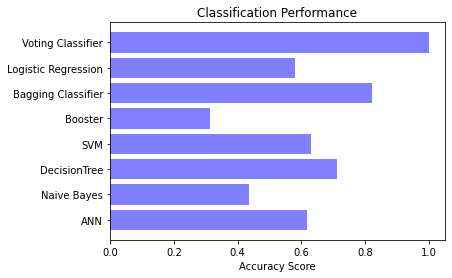

In [54]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

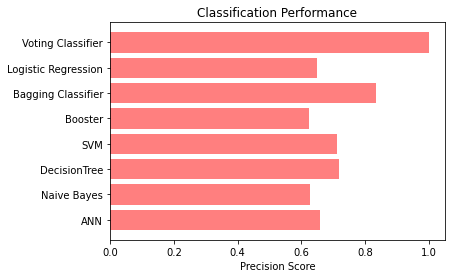

In [55]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

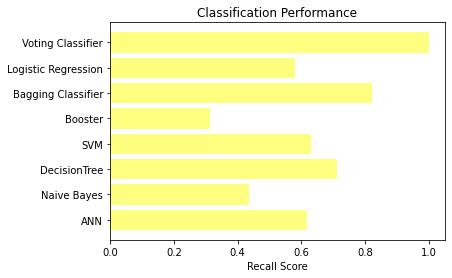

In [56]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

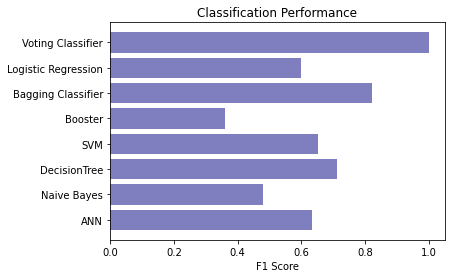

In [57]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()